# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load the dataset

In [2]:
file_path = "Mortality_Status_Prediction.csv"
data = pd.read_csv(file_path)

# Display basic info and first few rows

In [3]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4024 non-null   float64
 3   Sex                     4024 non-null   object 
 4   T_Stage                 4024 non-null   object 
 5   N_Stage                 4024 non-null   object 
 6   6th_Stage               4024 non-null   object 
 7   Differentiated          4024 non-null   object 
 8   Grade                   4024 non-null   int64  
 9   A_Stage                 4024 non-null   object 
 10  Tumor_Size              4024 non-null   float64
 11  Estrogen_Status         4024 non-null   object 
 12  Progesterone_Status     4024 non-null   object 
 13  Regional_Node_Examined  4024 non-null   float64
 14  Reginol_Node_Positive   4024 non-null   

In [4]:
data_head = data.head()
data_head

,Patient_ID,Month_of_Birth,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status,Age_Group
0,A0012,12,68.0,Female,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,Alive,50-70
1,A0013,12,50.0,Female,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,Alive,30-50
2,A0014,11,58.0,Female,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,Alive,50-70
3,A0015,3,58.0,Female,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,Alive,50-70
4,A0016,1,47.0,Female,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,Alive,30-50


In [5]:
data_summary = data.describe()
data_summary

,Month_of_Birth,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,6.481362,54.012922,2.150596,30.415258,14.373509,4.158052
std,3.475442,9.026948,0.638234,21.153706,8.128284,5.109331
min,1.000000,30.000000,1.000000,-75.000000,1.000000,1.000000
25%,3.000000,47.000000,2.000000,16.000000,9.000000,1.000000
50%,6.000000,54.000000,2.000000,25.000000,14.000000,2.000000
75%,10.000000,61.000000,3.000000,38.000000,19.000000,5.000000
max,12.000000,100.000000,4.000000,140.000000,61.000000,46.000000


In [6]:
data_nulls = data.isnull().sum()
data_nulls

Patient_ID                0
Month_of_Birth            0
Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Mortality_Status          0
Age_Group                 1
dtype: int64

In [7]:
data_classes = data["Mortality_Status"].value_counts()
print(data_classes)

Mortality_Status
Alive    3399
Dead      598
DEAD       10
dead        8
ALIVE       5
alive       3
ALive       1
Name: count, dtype: int64


# Data Cleaning

In [8]:
# Standardize 'Mortality_Status' labels
data["Mortality_Status"] = data["Mortality_Status"].str.lower().map({"alive": "Alive", "dead": "Dead"})

# Remove negative tumor sizes
data = data[data["Tumor_Size"] >= 0]

# Fill missing 'Age_Group' based on Age
data["Age_Group"] = data["Age_Group"].fillna("Unknown")

# Drop irrelevant columns
data_cleaned = data.drop(columns=["Patient_ID"])  # Patient_ID is not useful for prediction

# Check if all issues are fixed
data_cleaned.info(), data_cleaned["Mortality_Status"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month_of_Birth          4023 non-null   int64  
 1   Age                     4023 non-null   float64
 2   Sex                     4023 non-null   object 
 3   T_Stage                 4023 non-null   object 
 4   N_Stage                 4023 non-null   object 
 5   6th_Stage               4023 non-null   object 
 6   Differentiated          4023 non-null   object 
 7   Grade                   4023 non-null   int64  
 8   A_Stage                 4023 non-null   object 
 9   Tumor_Size              4023 non-null   float64
 10  Estrogen_Status         4023 non-null   object 
 11  Progesterone_Status     4023 non-null   object 
 12  Regional_Node_Examined  4023 non-null   float64
 13  Reginol_Node_Positive   4023 non-null   int64  
 14  Mortality_Status        4023 non-null   objec

(None,
 Mortality_Status
 Alive    3407
 Dead      616
 Name: count, dtype: int64)

# Preparing Data for training

In [9]:
# Encode categorical variables
label_encoders = {}
for col in data_cleaned.select_dtypes(include=["object"]).columns:
    if col != "Mortality_Status":  # Exclude target variable
        le = LabelEncoder()
        data_cleaned[col] = le.fit_transform(data_cleaned[col])
        label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
data_cleaned["Mortality_Status"] = target_encoder.fit_transform(data_cleaned["Mortality_Status"])  # 0: Alive, 1: Dead

# Pick dependent and independent variables
X = data_cleaned.drop(columns=["Mortality_Status"])
y = data_cleaned[["Mortality_Status"]]

In [10]:
X.head()

,Month_of_Birth,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Age_Group
0,12,68.0,0,0,0,0,1,3,1,4.0,1,1,24.0,1,1
1,12,50.0,0,1,1,2,0,2,1,35.0,1,1,14.0,5,0
2,11,58.0,0,2,2,4,0,2,1,63.0,1,1,14.0,7,1
3,3,58.0,0,0,0,0,1,3,1,18.0,1,1,2.0,1,1
4,1,47.0,0,1,0,1,1,3,1,41.0,1,1,3.0,1,0


In [11]:
y.head()

,Mortality_Status
0,0
1,0
2,0
3,0
4,0


In [12]:
y = y.values.ravel()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training model

In [13]:
# Define models with hyper parameter tuning
rf_grid = {"n_estimators": [50, 100, 200], "max_depth": [10, 20, None]}
knn_grid = {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
nb_grid = {"var_smoothing": np.logspace(-9, 0, 10)}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "Random Forest": RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=5, n_iter=5, scoring='accuracy', random_state=42),
    "KNN": RandomizedSearchCV(KNeighborsClassifier(), knn_grid, cv=5, n_iter=5, scoring='accuracy', random_state=42),
    "Naïve Bayes": RandomizedSearchCV(GaussianNB(), nb_grid, cv=5, n_iter=5, scoring='accuracy', random_state=42),
}


# Train models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Get best estimator if using hyperparameter tuning
    best_model = model.best_estimator_ if isinstance(model, RandomizedSearchCV) else model
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["Dead", "Alive"], zero_division=0)

    results[model_name] = {"accuracy": accuracy, "report": report}

Training Logistic Regression...
Training Random Forest...
Training KNN...
Training Naïve Bayes...


In [14]:
# Extract and format classification reports
formatted_results = {}

for model_name, metrics in results.items():
    accuracy = metrics["accuracy"]
    report_lines = metrics["report"].split("\n")
    extracted_metrics = [line.split() for line in report_lines if len(line.split()) == 5]

    if extracted_metrics:
        precision_dead, recall_dead, f1_dead, _ = extracted_metrics[0][1:]
        precision_alive, recall_alive, f1_alive, _ = extracted_metrics[1][1:]
        formatted_results[model_name] = {
            "Accuracy": round(accuracy * 100, 2),
            "Precision (Dead)": precision_dead,
            "Recall (Dead)": recall_dead,
            "F1-Score (Dead)": f1_dead,
            "Precision (Alive)": precision_alive,
            "Recall (Alive)": recall_alive,
            "F1-Score (Alive)": f1_alive,
        }

In [15]:
# Convert results into a DataFrame for better readability
formatted_df = pd.DataFrame.from_dict(formatted_results, orient='index')
formatted_df

,Accuracy,Precision (Dead),Recall (Dead),F1-Score (Dead),Precision (Alive),Recall (Alive),F1-Score (Alive)
Logistic Regression,70.06,0.90,0.72,0.80,0.27,0.58,0.37
Random Forest,84.10,0.85,0.98,0.91,0.38,0.07,0.11
KNN,84.47,0.85,0.99,0.92,0.44,0.06,0.10
Naïve Bayes,83.73,0.85,0.97,0.91,0.36,0.08,0.13


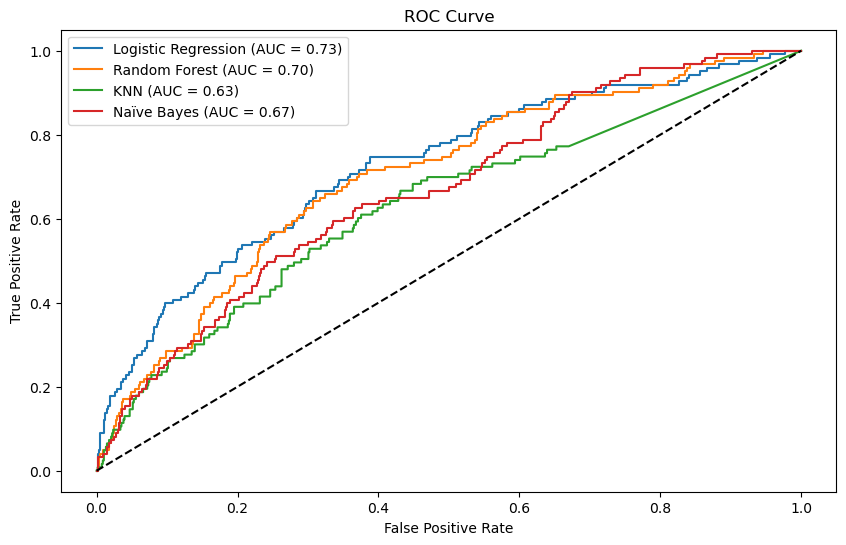

In [16]:
# Generate ROC curve
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()